In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2
from skimage import measure
from skimage.draw import rectangle_perimeter
import os

In [2]:
#images_folder = "../sample_dataset/Original"
images_folder = '../Figs'
path_files_images = glob.glob(f"{images_folder}/*.*")
print('Path imagens: ', path_files_images[:])

#masks_folder = "../sample_dataset/Original - masks"
masks_folder = '../Figs'
path_files_masks = glob.glob(f"{masks_folder}/*.*")
print('Path masks: ', path_files_masks[:2])


Path imagens:  ['../Figs\\cell_crop_train.png', '../Figs\\cof_dice.png', '../Figs\\crop_cell.png', '../Figs\\gif_run_cell.gif', '../Figs\\hit.png', '../Figs\\img_exemplo.png', '../Figs\\Loss.png', '../Figs\\masks_crop_train.png', '../Figs\\mask_exemplo.png', '../Figs\\Mask_MANUAL.png', '../Figs\\orig_zoom.png', '../Figs\\ori_mask_overlay.png', '../Figs\\Ori_mask_train.png', '../Figs\\predic_vs_manual.png']
Path masks:  ['../Figs\\cell_crop_train.png', '../Figs\\cof_dice.png']


In [3]:
id = 5

mask_exemple = cv2.imread('../Figs\mask_exemplo.png', cv2.IMREAD_GRAYSCALE)
print('Shape imagens: ', mask_exemple.shape)
print('Imagens unique values: ', np.unique(mask_exemple))

Shape imagens:  (540, 720)
Imagens unique values:  [  0 255]


(-0.5, 719.5, 539.5, -0.5)

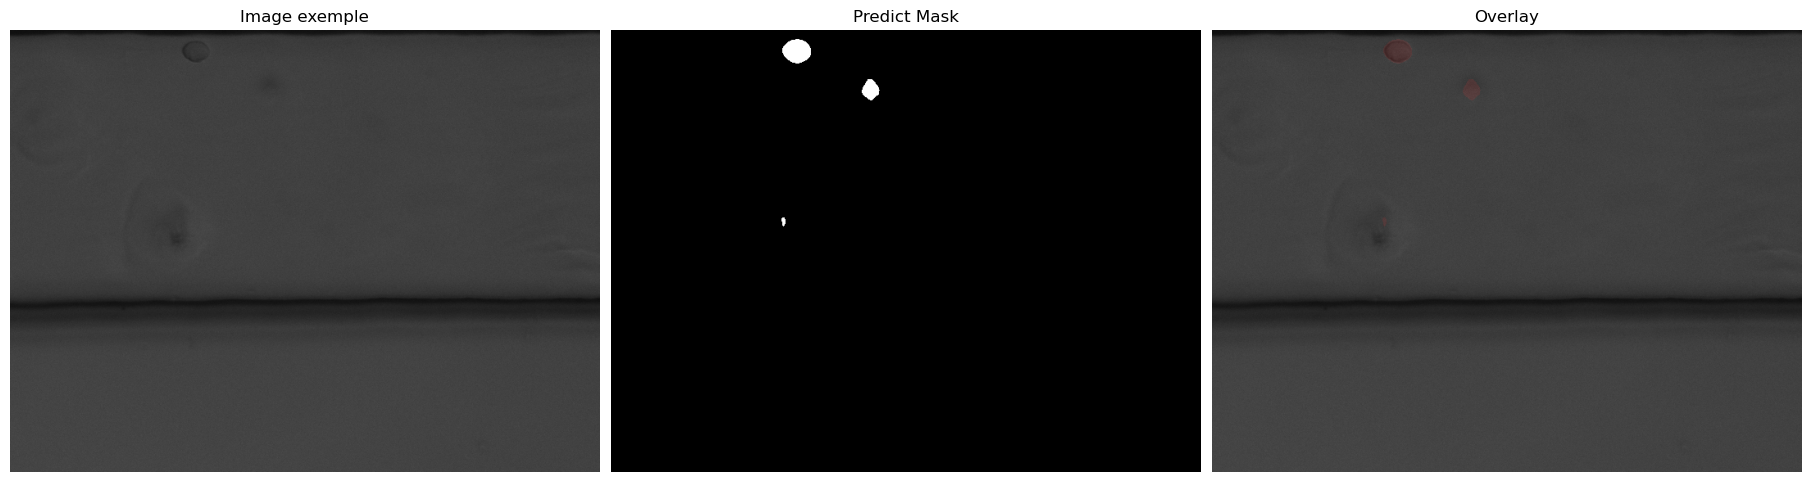

In [4]:
fig, axs = plt.subplots(1, 3, layout='constrained', figsize=(18, 10))

image_exemple = cv2.imread('../Figs\img_exemplo.png')
mask_exemple = cv2.imread('../Figs\mask_exemplo.png')

mask2overlay = mask_exemple.copy()
mask2overlay[:,:,1:] = 0 # Keep only red channel
overlay = cv2.addWeighted(image_exemple, 1, mask2overlay, 0.1, 0)

axs[0].set_title('Image exemple')
axs[0].imshow(image_exemple, cmap = 'gray')
axs[0].axis('off')

axs[1].set_title('Predict Mask')
axs[1].imshow(mask_exemple, cmap = 'gray')
axs[1].axis('off')

axs[2].set_title('Overlay')
axs[2].imshow(overlay)
axs[2].axis('off')


(-0.5, 44.5, 37.5, -0.5)

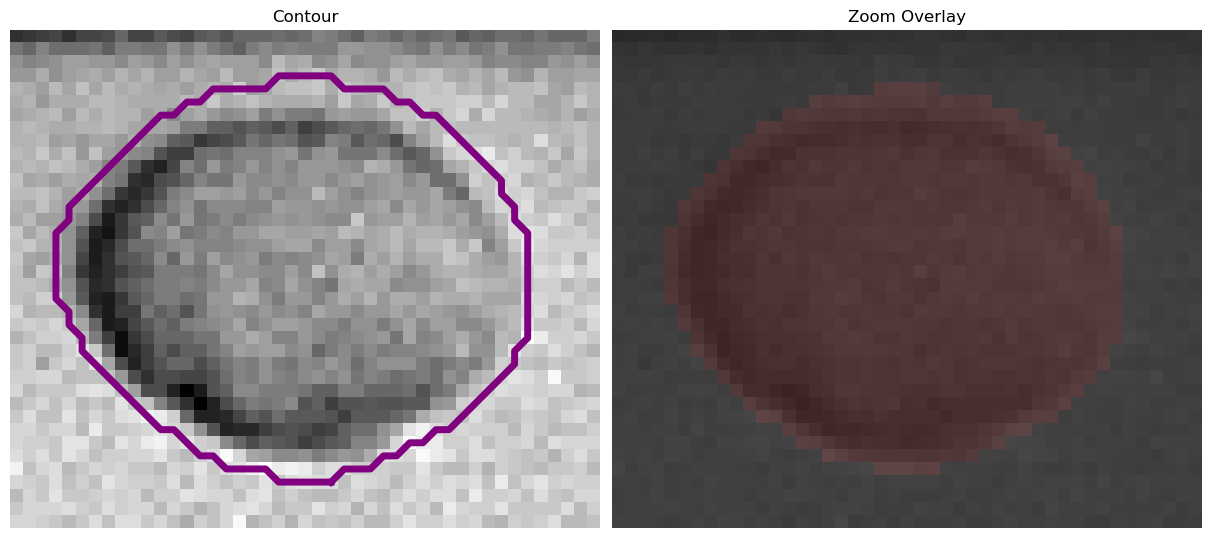

In [5]:
y0, y1 = 7, 45
x0, x1 = 205, 250

contours = measure.find_contours(mask_exemple[y0:y1,x0:x1,0], 0.8)

fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(12, 6))

ax[0].set_title('Contour')
ax[0].imshow(image_exemple[y0:y1,x0:x1, 0], cmap='gray')

for contour in contours:
    ax[0].plot(contour[:, 1], contour[:, 0], linewidth=5, color = 'purple')

ax[0].axis("off")

ax[1].set_title('Zoom Overlay')
ax[1].imshow(overlay[y0:y1,x0:x1])
ax[1].axis('off')

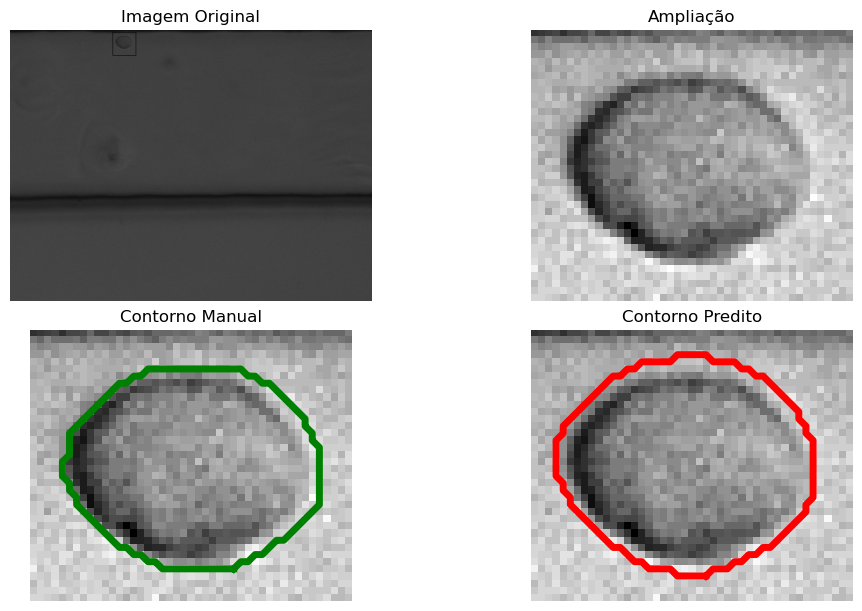

In [ ]:
img_crop = image_exemple[y0:y1, x0:x1]

img_manual = cv2.imread('../Figs/Mask_MANUAL.png', cv2.IMREAD_GRAYSCALE)

start  = (y0, x0)
extent = (45, 45)

rr, cc = rectangle_perimeter(start=start, extent=extent, shape=image_exemple.shape)
image_exemple[rr, cc] = 1


contours = measure.find_contours(mask_exemple[y0:y1, x0:x1, 0], 0.8)
contours_manual = measure.find_contours(img_manual, 0.8)


fig, ax = plt.subplots(2, 2, layout='constrained', figsize=(10, 6))


ax[0, 0].set_title('Imagem Original')
ax[0, 0].imshow(image_exemple, cmap='gray')
ax[0, 0].axis('off')


ax[0, 1].set_title('Ampliação')
ax[0, 1].imshow(img_crop[:,:,1], cmap='gray') # I used the green channel just for better viewing
ax[0, 1].axis('off')


ax[1, 0].set_title('Contorno Manual')
ax[1, 0].imshow(img_crop[:,:,1], cmap='gray')
for contour in contours_manual:
    ax[1, 0].plot(contour[:, 1], contour[:, 0], linewidth=5, color='green')
ax[1, 0].axis('off')


ax[1, 1].set_title('Contorno Predito')
ax[1, 1].imshow(image_exemple[y0:y1, x0:x1, 1], cmap='gray')
for contour in contours:
    ax[1, 1].plot(contour[:, 1], contour[:, 0], linewidth=5, color='red')
ax[1, 1].axis('off')


plt.show()


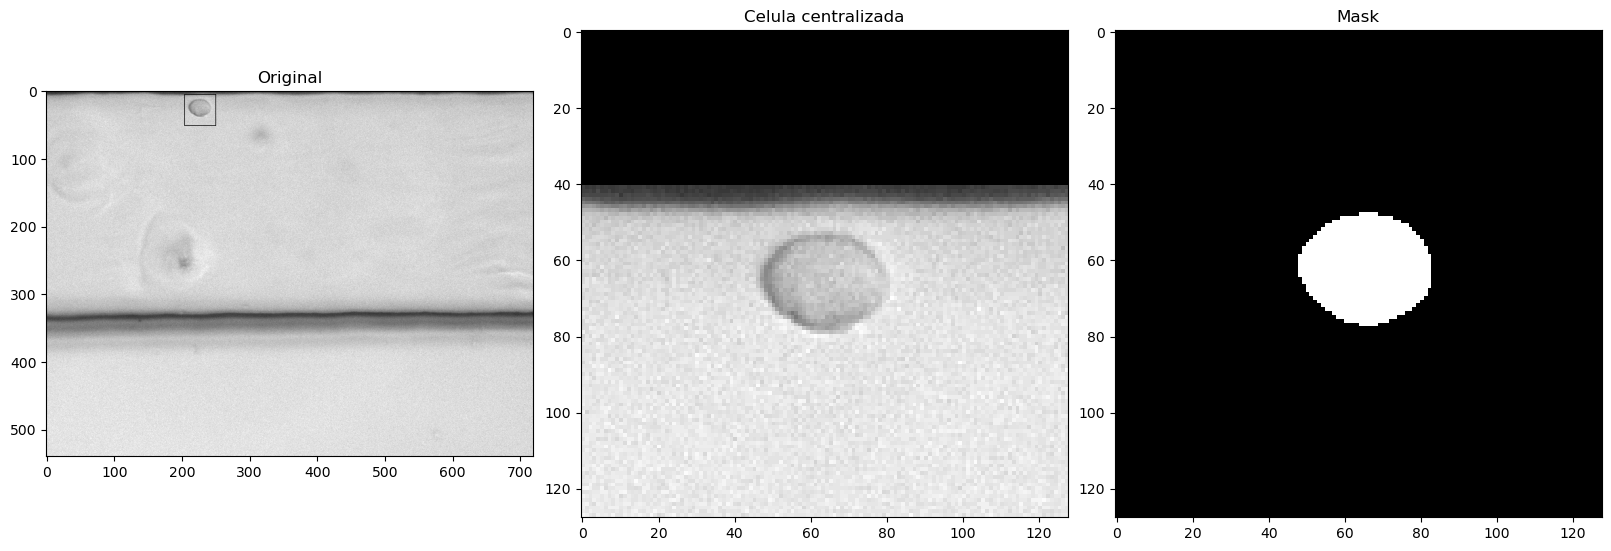

In [ ]:
cell_crop_train = cv2.imread('../Figs\cell_crop_train.png', cv2.IMREAD_GRAYSCALE)
mask_crop_train = cv2.imread('../Figs\masks_crop_train.png', cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 3, layout='constrained', figsize=(16, 12))

ax[0].set_title('Original')
ax[0].imshow(image_exemple[:,:,1], cmap='gray') # I used the green channel just for better viewing
ax[0, 1].axis('off')
ax[0].axis("on")

ax[1].set_title('Celula centralizada')
ax[1].imshow(cell_crop_train, cmap='gray')

ax[1].axis("on")

ax[2].set_title('Mask')
ax[2].imshow(mask_crop_train, cmap='gray')
ax[2].axis('on')

plt.show()

In [17]:
img_for_gif = sorted(glob.glob('../Dataset/Validacao/Exp/*.*'))
mask_for_gif = sorted(glob.glob('../Dataset/Validacao/predict/*.*'))
out_dir      = r'../Dataset/Validacao/overlay'

os.makedirs(out_dir, exist_ok=True)

for img_path, mask_path in zip(img_for_gif, mask_for_gif):
    base_name = os.path.basename(img_path)
    image = cv2.imread(img_path)
    mask  = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    
    if mask.max() <= 1:
        mask = (mask * 255).astype(np.uint8)

    mask_color = np.zeros_like(image)
    mask_color[:, :, 2] = mask   

    
    overlay = cv2.addWeighted(image, 1.0, mask_color, 0.25, 0)

    out_path = os.path.join(out_dir, base_name)
    cv2.imwrite(out_path, overlay)